In [20]:
import pandas as pd
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy import stats
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [9]:
'''Data Mining Project
'''

# Preprocessing and initial data exploration
df = pd.read_csv('./Inpatient_Data_2011_CSV/Medicare_Provider_Charge_Inpatient_DRG100_FY2011.csv')
df.describe()

,Provider Id,Provider Zip Code,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
count,163065.000000,163065.000000,163065.000000,163065.000000,163065.000000,163065.000000
mean,255569.865428,47938.121908,42.776304,36133.958434,9707.477867,8494.495174
std,151563.671767,27854.323080,51.104042,35065.365905,7664.642652,7309.467247
min,10001.000000,1040.000000,11.000000,2459.400000,2673.000000,1148.909091
25%,110092.000000,27261.000000,17.000000,15947.166670,5234.500000,4192.354839
50%,250007.000000,44309.000000,27.000000,25245.823530,7214.100000,6158.465116
75%,380075.000000,72901.000000,49.000000,43232.592590,11286.400000,10056.882350
max,670077.000000,99835.000000,3383.000000,929118.909100,156158.181800,154620.818200


In [7]:
pandas_profiling.ProfileReport(df)

KeyboardInterrupt: 

In [10]:
'''
Preprocessing
  - Encode the columns that have text instead of numbers
'''
print(df.columns)

encoder = preprocessing.OrdinalEncoder()

cols = ['DRG Definition','Provider Name','Provider Street Address', 'Provider City', 'Provider State','Hospital Referral Region (HRR) Description']
for col in cols:
    topic = np.array(df[col].unique()).reshape(-1,1)
    encoder.fit(topic)
    df[col] = encoder.transform(np.array(df[col]).reshape(-1,1))

df.head()

Index(['DRG Definition', 'Provider Id', 'Provider Name',
       'Provider Street Address', 'Provider City', 'Provider State',
       'Provider Zip Code', 'Hospital Referral Region (HRR) Description',
       'Total Discharges', 'Average Covered Charges', 'Average Total Payments',
       'Average Medicare Payments'],
      dtype='object')


,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region (HRR) Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
0,0.0,10001,2518.0,318.0,454.0,1.0,36301,2.0,91,32963.07692,5777.241758,4763.736264
1,0.0,10005,1498.0,1493.0,177.0,1.0,35957,1.0,14,15131.85714,5787.571429,4976.714286
2,0.0,10006,729.0,1229.0,582.0,1.0,35631,1.0,24,37560.37500,5434.958333,4453.791667
3,0.0,10011,2722.0,2290.0,162.0,1.0,35235,1.0,25,13998.28000,5417.560000,4129.160000
4,0.0,10016,2444.0,86.0,13.0,1.0,35007,1.0,18,31633.27778,5658.333333,4851.444444


In [ ]:
'''
Data Exploration continued
  - More plotting and stuff
'''
# Warning: This will take a bit of time to run so be prepared before running (possible 20+ mins) see file it is saved to
sns.pairplot(df)
plt.savefig('Column_by_Column.png')

In [ ]:
# Bar graphs that are more readable
i = 0
for col in df.columns:
    plt.figure(i)
    sns.distplot(df[col])
    i+=1

In [ ]:
# Box plots of data
i = 0
for col in df.columns:
    plt.figure(i)
    sns.boxplot(df[col])
    i+=1

In [11]:
df.describe()

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region (HRR) Description,Total Discharges,Average Covered Charges,Average Total Payments,Average Medicare Payments
count,163065.000000,163065.000000,163065.000000,163065.000000,163065.000000,163065.000000,163065.000000,163065.000000,163065.000000,163065.000000,163065.000000,163065.000000
mean,48.805568,255569.865428,1637.504382,1680.229865,964.389188,24.179560,47938.121908,151.779254,42.776304,36133.958434,9707.477867,8494.495174
std,28.934214,151563.671767,926.613671,961.281152,564.127054,14.499223,27854.323080,87.552090,51.104042,35065.365905,7664.642652,7309.467247
min,0.000000,10001.000000,0.000000,0.000000,0.000000,0.000000,1040.000000,0.000000,11.000000,2459.400000,2673.000000,1148.909091
25%,22.000000,110092.000000,838.000000,847.000000,454.000000,10.000000,27261.000000,71.000000,17.000000,15947.166670,5234.500000,4192.354839
50%,48.000000,250007.000000,1665.000000,1689.000000,970.000000,24.000000,44309.000000,158.000000,27.000000,25245.823530,7214.100000,6158.465116
75%,75.000000,380075.000000,2462.000000,2514.000000,1449.000000,37.000000,72901.000000,227.000000,49.000000,43232.592590,11286.400000,10056.882350
max,99.000000,670077.000000,3200.000000,3325.000000,1976.000000,50.000000,99835.000000,305.000000,3383.000000,929118.909100,156158.181800,154620.818200


Min: 5.970146577996632e-07, Max: 65.3614426838996
STD: 0.618197525812431
Mean: 0.7860227853436493


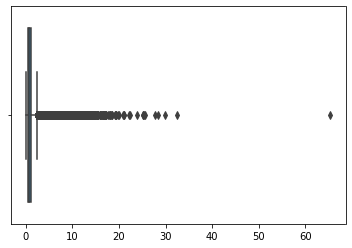

In [5]:
# No used, but we can talk about what we tried using z-scores
df_z = np.abs(stats.zscore(df))
df_z.sort()
max = np.max(df_z)
min = np.min(df_z)
print(f'Min: {min}, Max: {max}')
print(f'STD: {np.std(df_z)}')
print(f'Mean: {np.mean(df_z)}')

sns.boxplot(df_z)


df2 = df[(np.abs(stats.zscore(df)) <= 1).all(axis=1)]
df2.head()
sns.boxplot(stats.zscore(df2))

In [15]:
'''
KMeans Code Section 
  - Uses PCA to reduce the features
  - Then does K-Means
  - Two K-Means one without standardization and one with
'''
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
target = df['Average Total Payments']
X = df.drop(columns='Average Total Payments')

X.describe()

,DRG Definition,Provider Id,Provider Name,Provider Street Address,Provider City,Provider State,Provider Zip Code,Hospital Referral Region (HRR) Description,Total Discharges,Average Covered Charges,Average Medicare Payments
count,163065.000000,163065.000000,163065.000000,163065.000000,163065.000000,163065.000000,163065.000000,163065.000000,163065.000000,163065.000000,163065.000000
mean,48.805568,255569.865428,1637.504382,1680.229865,964.389188,24.179560,47938.121908,151.779254,42.776304,36133.958434,8494.495174
std,28.934214,151563.671767,926.613671,961.281152,564.127054,14.499223,27854.323080,87.552090,51.104042,35065.365905,7309.467247
min,0.000000,10001.000000,0.000000,0.000000,0.000000,0.000000,1040.000000,0.000000,11.000000,2459.400000,1148.909091
25%,22.000000,110092.000000,838.000000,847.000000,454.000000,10.000000,27261.000000,71.000000,17.000000,15947.166670,4192.354839
50%,48.000000,250007.000000,1665.000000,1689.000000,970.000000,24.000000,44309.000000,158.000000,27.000000,25245.823530,6158.465116
75%,75.000000,380075.000000,2462.000000,2514.000000,1449.000000,37.000000,72901.000000,227.000000,49.000000,43232.592590,10056.882350
max,99.000000,670077.000000,3200.000000,3325.000000,1976.000000,50.000000,99835.000000,305.000000,3383.000000,929118.909100,154620.818200


In [13]:
# Not used

# result = pd.DataFrame(pca.fit_transform(X))
# print(f"Explained varience {pca.explained_variance_ratio_}")
# kmean = KMeans(n_clusters=2).fit(result)
# sns.set()

# res

# sns.relplot(data=result.sample(frac=.5))

In [17]:
test1, test2 = train_test_split(df,test_size=.5,random_state=1)
temp = pd.DataFrame(pca.fit(test1).transform(test1))
result = pd.DataFrame(temp)
# Add explained varience to the slides and what it means
print(f"Explained varience {pca.explained_variance_ratio_}")
kmean = KMeans(n_clusters=3,random_state=3).fit(result)

Explained varience [0.91650481 0.05260007]


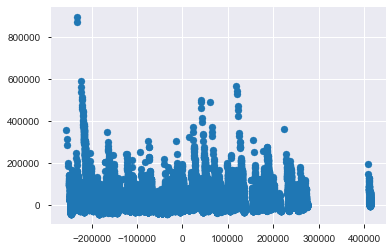

In [18]:
plt.scatter(x=temp[0],y=temp[1])

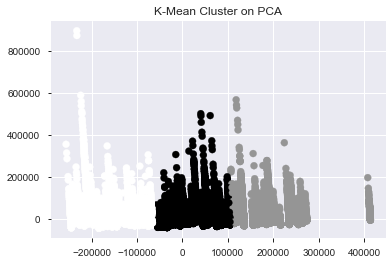

In [19]:
# Explain these in the slides
colors = kmean.fit_predict(test1)
plt.title("K-Mean Cluster on PCA")
plt.scatter(result[0],result[1],c=colors)

In [39]:
# Talk about this comparision in the slides between normal results and the standarization results
for col in df.columns:
    range_ = df[col].max() - df[col].min()
    print(f"Range for {col} is {range_}")

Range for DRG Definition is 99.0
Range for Provider Id is 660076
Range for Provider Name is 3200.0
Range for Provider Street Address is 3325.0
Range for Provider City is 1976.0
Range for Provider State is 50.0
Range for Provider Zip Code is 98795
Range for Hospital Referral Region (HRR) Description is 305.0
Range for Total Discharges is 3372
Range for Average Covered Charges is 926659.5091
Range for Average Total Payments is 153485.1818
Range for Average Medicare Payments is 153471.909109


In [47]:
stand = preprocessing.StandardScaler()
df2 = df.copy()
for col in df2.columns:
    arr = np.array(df2[col]).reshape(-1,1)
    df2[col] = stand.fit_transform(arr)
    range_ = df2[col].max() - df2[col].min()
    print(f"Range for {col} is {range_}")

Range for DRG Definition is 3.4215653345800305
Range for Provider Id is 4.35512030211676
Range for Provider Name is 3.453445499455457
Range for Provider Street Address is 3.4589362228102614
Range for Provider City is 3.5027677627952483
Range for Provider State is 3.448471190862593
Range for Provider Zip Code is 3.546857076738819
Range for Hospital Referral Region (HRR) Description is 3.483651094197586
Range for Total Discharges is 65.98324087973023
Range for Average Covered Charges is 26.426712699850988
Range for Average Total Payments is 20.02515438683522
Range for Average Medicare Payments is 20.996383799987104


Explained varience [0.25753317 0.21632702]


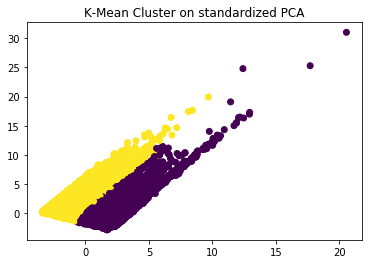

In [52]:
# Standarized PCA
test1, test2 = train_test_split(df2,test_size=.5,random_state=1)
temp = pd.DataFrame(pca.fit(test1).transform(test1))
result = pd.DataFrame(temp)
print(f"Explained varience {pca.explained_variance_ratio_}")
kmean = KMeans(n_clusters=2,random_state=1).fit(result)
colors = kmean.fit_predict(test1)
plt.title("K-Mean Cluster on standardized PCA")
plt.scatter(result[0],result[1],c=colors)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)
[-3.88873665e-01  7.43382290e-05  1.89229855e-02  6.76647342e-03
 -2.44363639e-02  1.21526740e+00  7.85246358e-04  3.67606555e-01
  8.25554585e-01  7.33833722e-03  1.01070958e+00]

Accuracy Percentage:  0.9807863985943546
Mean Absolute Error: 521.9732778837767
Mean Squared Error: 1135449.998421942
Root Mean Squared Error: 1065.5749614278395


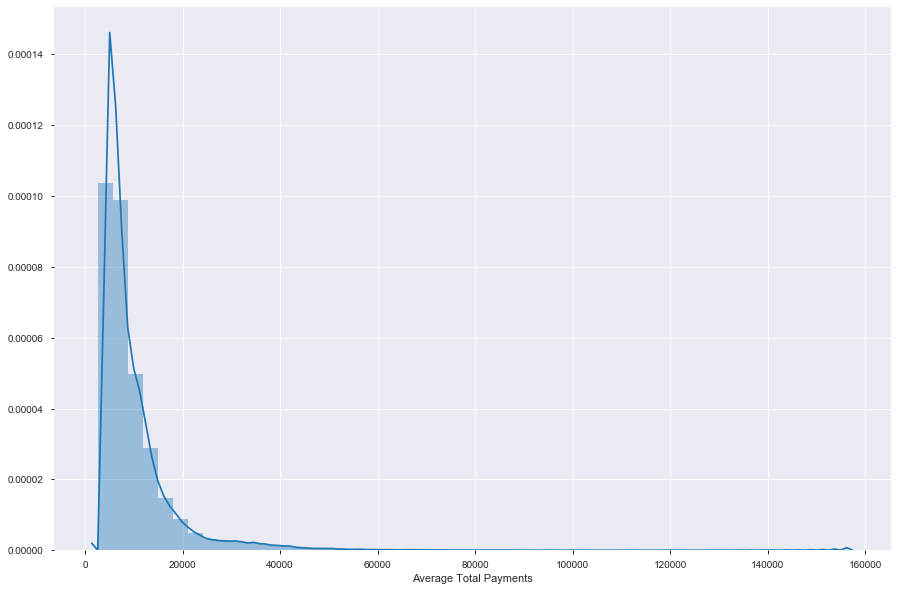

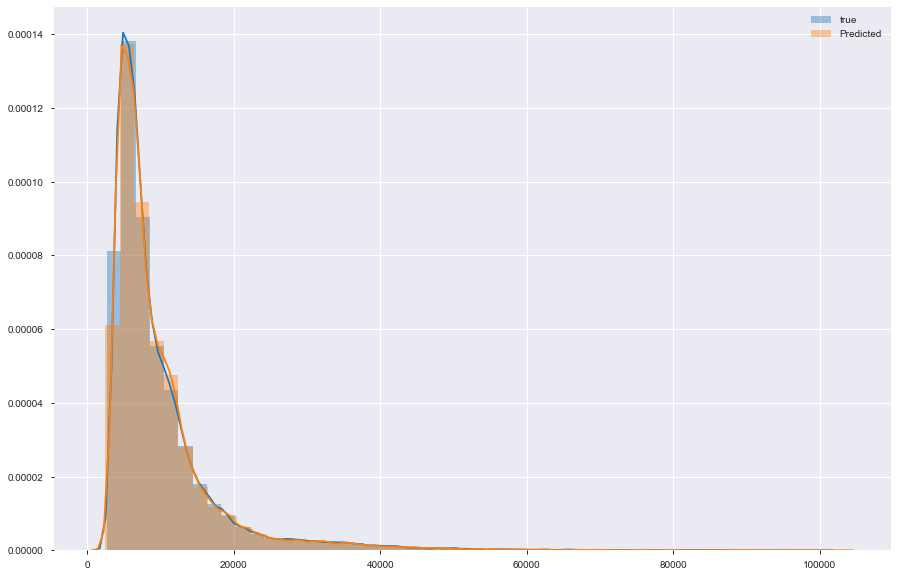

In [42]:
# Multiple Linear Regression Algorithm

y = df['Average Total Payments'].values
X = df.drop(columns='Average Total Payments').values
# X.describe()
plt.figure(0,figsize=(15,10))
plt.tight_layout()
sns.distplot(df['Average Total Payments'])




X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regressor = LinearRegression()  
regressor.fit(X_train, y_train)
print(regressor)

coeff_df = regressor.coef_
print(coeff_df)


y_pred = regressor.predict(X_test)
df_ML = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
# These graphs will be explained in the slides
plt.figure(1,figsize=(15,10))
sns.distplot(y_test,label='true')
sns.distplot(y_pred,label='Predicted')
plt.legend()
print("\nAccuracy Percentage: ",regressor.score(X_test,y_test))
df_ML.describe()


# Alternate Graph
# df1.plot(kind='bar',figsize=(10,8))
# plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
# plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
# plt.show()

# Explain these in the presentation
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))